In [1]:
import urllib.parse
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#First things first, lets read in our data


file_path = 'links.tsv'
df = pd.read_csv(file_path, sep='\t')
df.head()

,encoded_root,raw_topic
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland


In [3]:
#There is an encoding on our links, so let's first decode it:
df['root'] = df['encoded_root'].apply(lambda x: urllib.parse.unquote(x))
df.head()

,encoded_root,raw_topic,root
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede,Áedán_mac_Gabráin
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba,Áedán_mac_Gabráin
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata,Áedán_mac_Gabráin
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain,Áedán_mac_Gabráin
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,Áedán_mac_Gabráin


In [4]:
#There is still some irregularity in the raw_topic column, IE 'D%C3%A1l_Riata'. Looking at the page, it appears as though its supposed to be  Dál Riata.
#This indicates that the topic, encoded root, and decoded have diffent encoding schemas for how they handle characters
#Lets try and solve this issue
def character_correct(encoded_string):
    decoded_string = urllib.parse.unquote(encoded_string)
    final_string = decoded_string.replace('_', ' ')
    return final_string

df['root'] = df['root'].apply(character_correct)
df['topic'] = df['raw_topic'].apply(character_correct)
df

,encoded_root,raw_topic,root,topic
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede,Áedán mac Gabráin,Bede
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba,Áedán mac Gabráin,Columba
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata,Áedán mac Gabráin,Dál Riata
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain,Áedán mac Gabráin,Great Britain
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland,Áedán mac Gabráin,Ireland
...,...,...,...,...
119877,Zulu,South_Africa,Zulu,South Africa
119878,Zulu,Swaziland,Zulu,Swaziland
119879,Zulu,United_Kingdom,Zulu,United Kingdom
119880,Zulu,Zambia,Zulu,Zambia


In [5]:
#Now that is looking a lot better. From here, we need to focus on creating the linkages between nodes.
#We have a series of items that are essentially lists linking one item to another

graph = nx.DiGraph()
for index, row in df.iterrows():
    graph.add_edge(row['root'], row['topic'])
print(nx.info(graph))


Name: 
Type: DiGraph
Number of nodes: 4592
Number of edges: 119882
Average in degree:  26.1067
Average out degree:  26.1067


In [6]:
#I really just want to visualize this, but the node size does not effectively enable visualisation. 

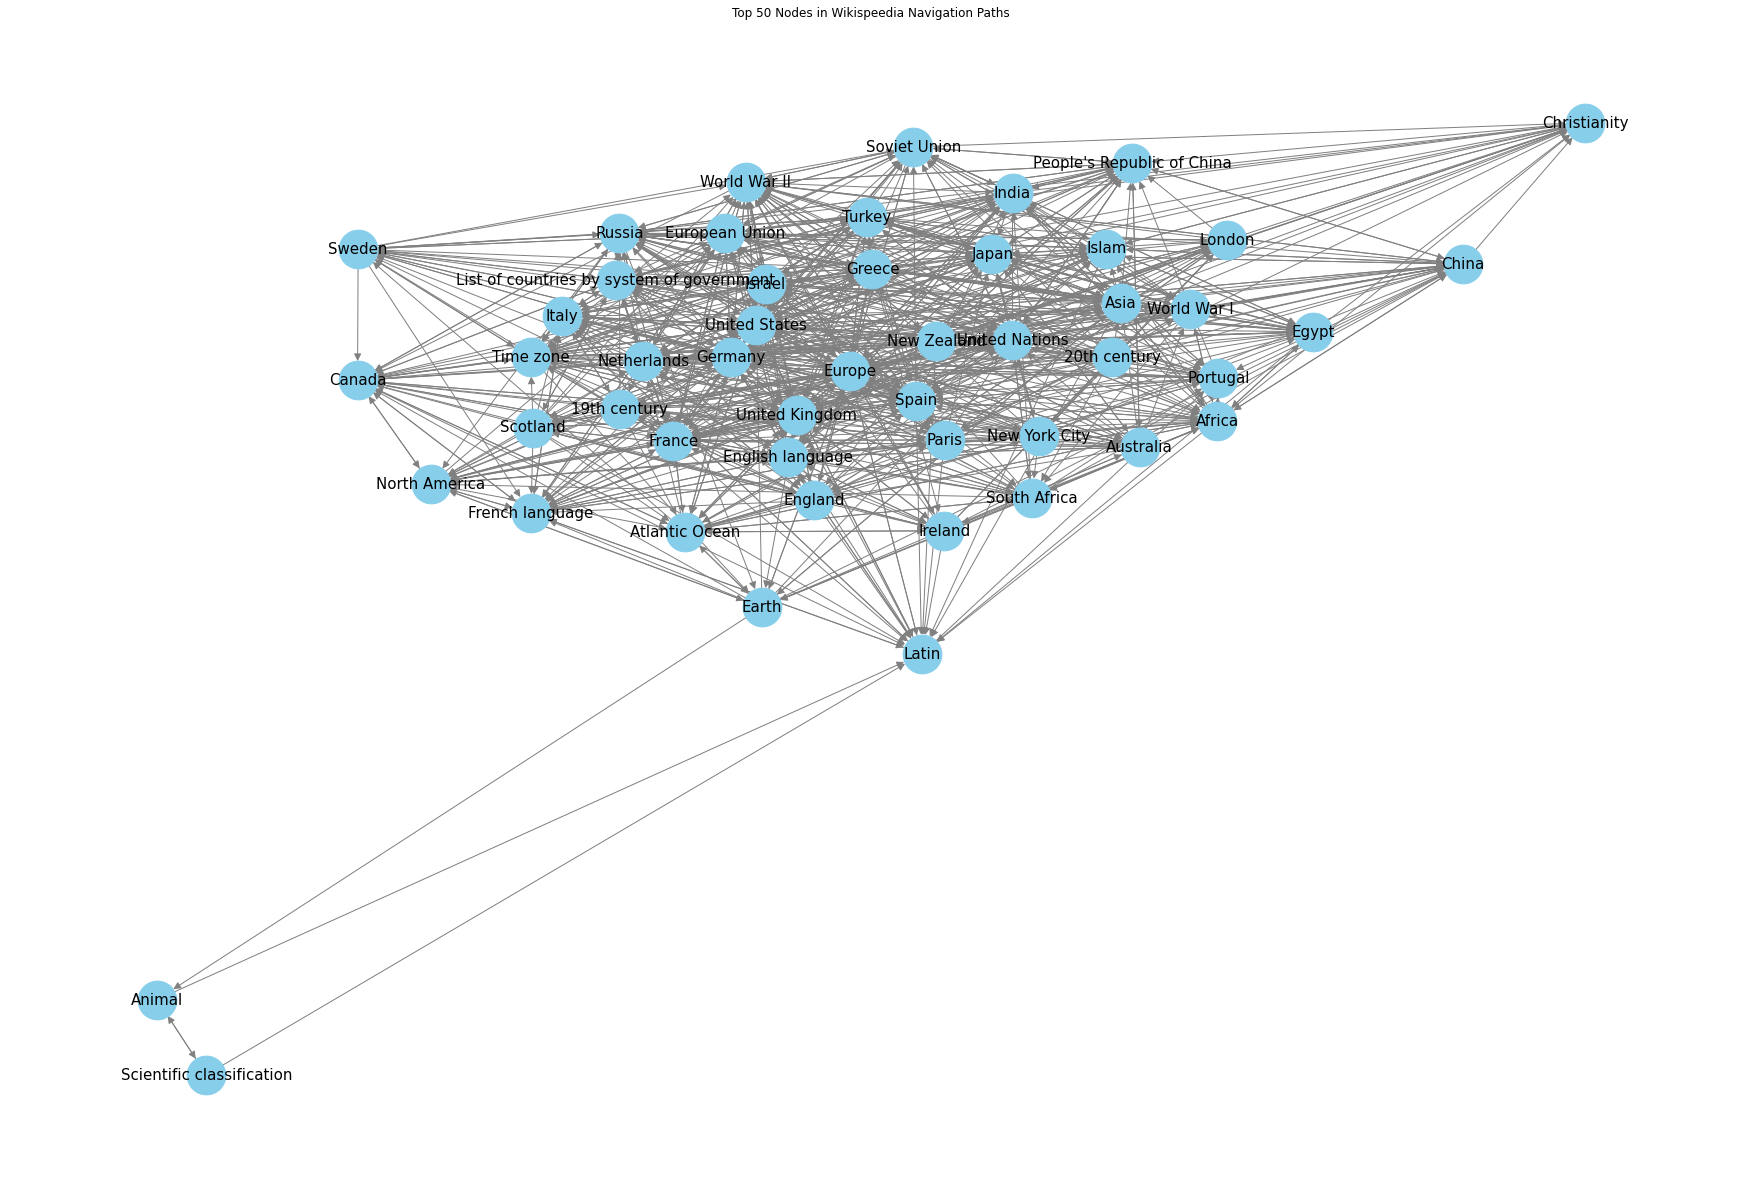

In [7]:
#Graphing all the nodes is not possible. 
top_50_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:50]
top_50_nodes = [node for node, degree in top_50_nodes]

#Create a subgraph
subgraph = graph.subgraph(top_50_nodes) #I'm trimming down the data so my laptop can handle this
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(subgraph, k=0.1)  
nx.draw(subgraph, pos, node_size=1500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=15, arrowsize=15)
plt.title("Top 50 Nodes in Wikispeedia Navigation Paths")
plt.show()


In [8]:
#Lets look at the diameter. Lets focus in on just the top 50 as trying to compute the full dataset requries too much compute. 

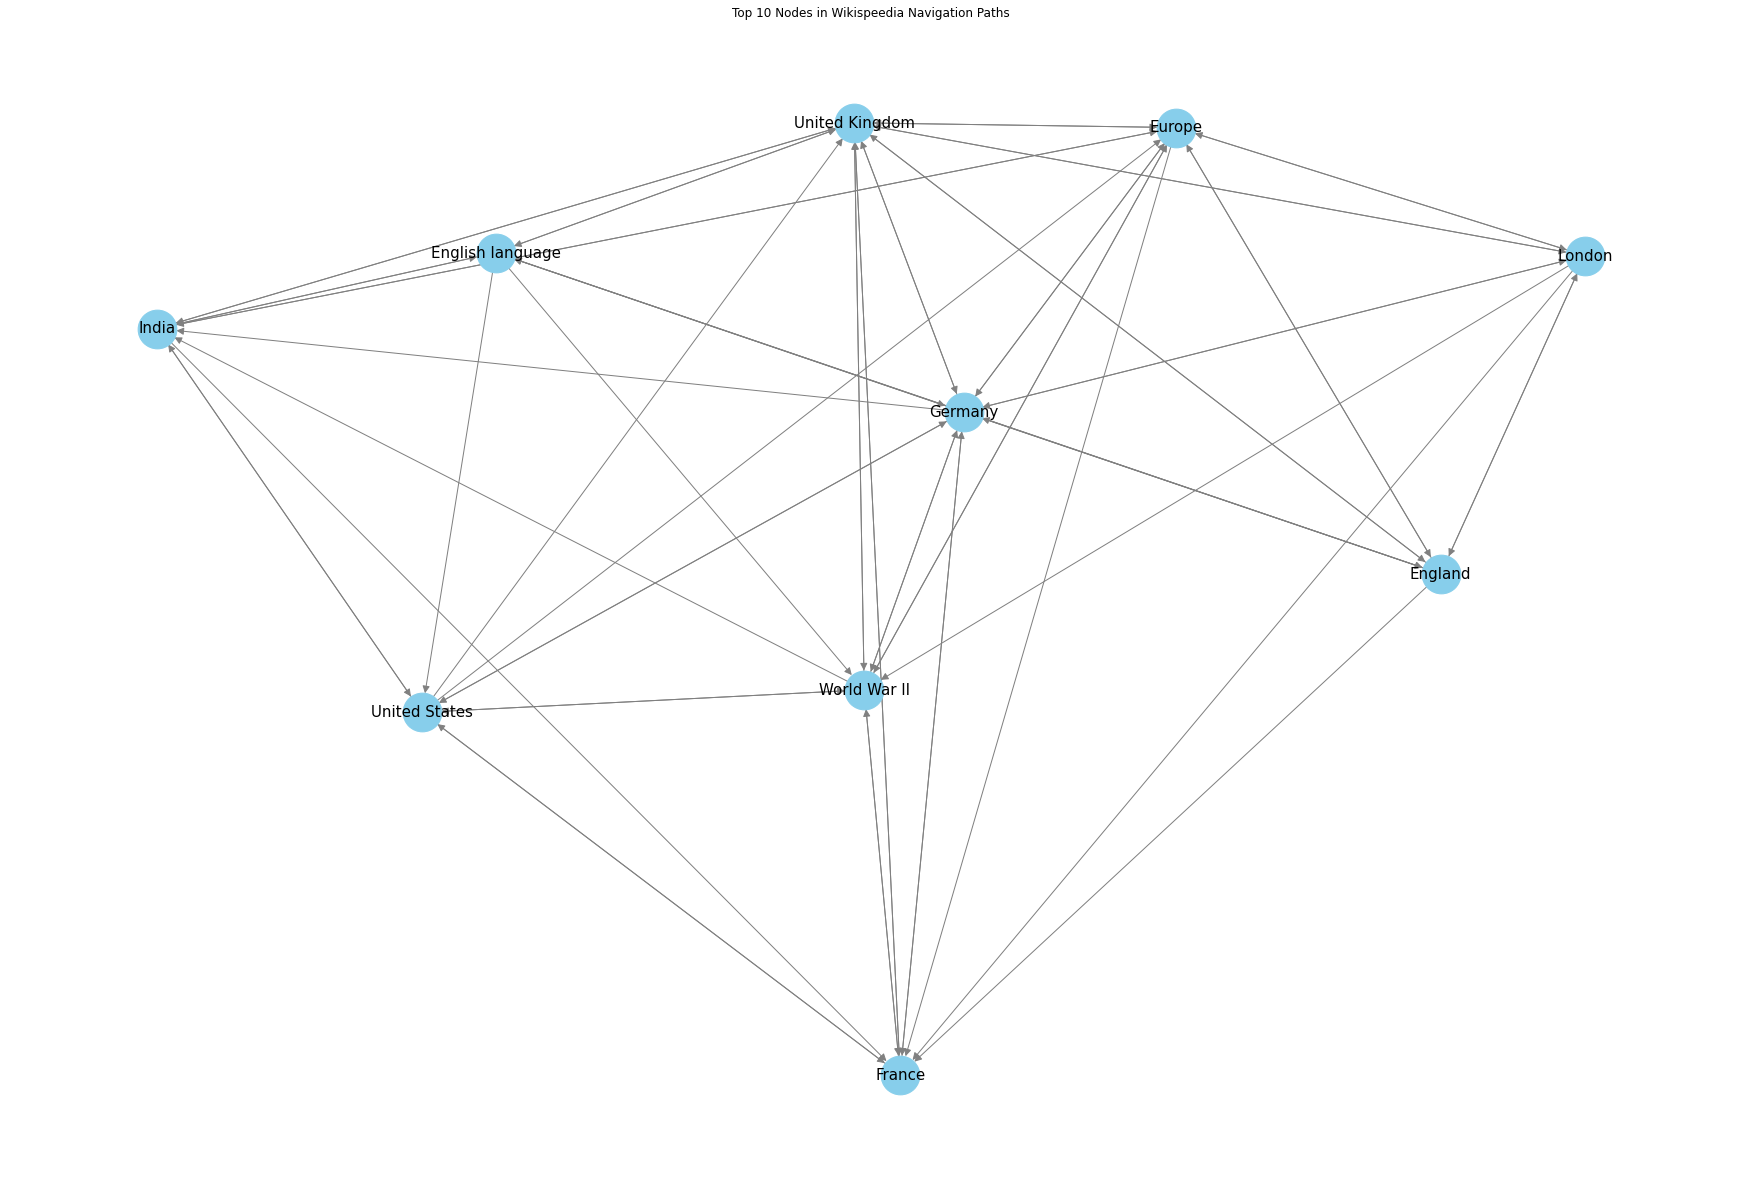

Diameter of the largest connected component: 2
Diameter path: ['India', 'English language', 'World War II']


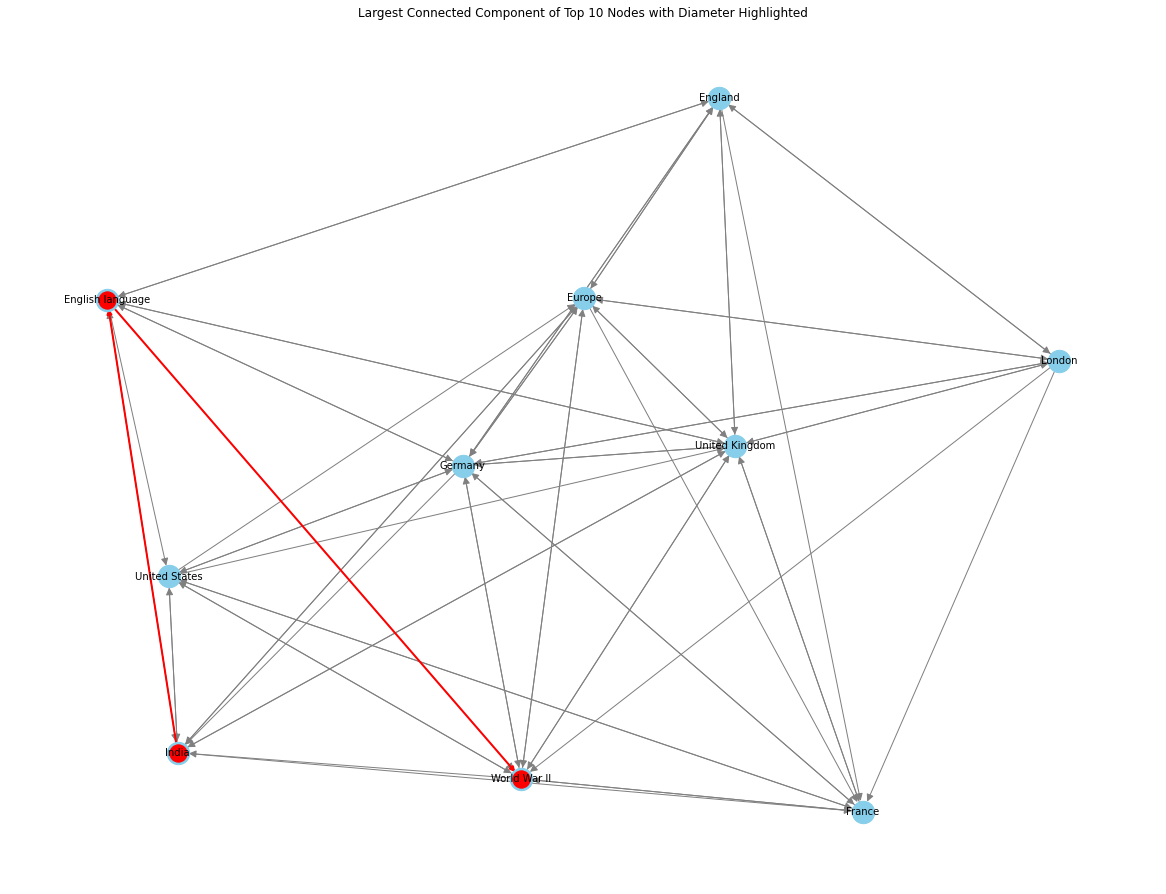

In [16]:
#As per geeks for geeks:
#Strongly Connected: A graph is said to be strongly connected if every pair of vertices(u, v) in the graph contains a path between each other. In an unweighted directed graph G, every pair of vertices u and v should have a path in each direction between them i.e., bidirectional path. The elements of the path matrix of such a graph will contain all 1’s.
#Unilaterally Connected: A graph is said to be unilaterally connected if it contains a directed path from u to v OR a directed path from v to u for every pair of vertices u, v. Hence, at least for any pair of vertices, one vertex should be reachable form the other. Such a path matrix would rather have upper triangle elements containing 1’s OR lower triangle elements containing 1’s.
#Weakly Connected: A directed graph is weakly connected if there is a path between every two vertices in the underlying undirected graph (i.e, the graph formed when the direction of the edges are removed).
#Were goinge to create a cut of the top 10, so that we can functionally work with this data. 

top_10_nodes = sorted(graph.degree, key=lambda x: x[1], reverse=True)[:10] #Lets get the top 10
top_10_nodes = [node for node, degree in top_10_nodes]

#Create a subgraph with the top 10 nodes
subgraph = graph.subgraph(top_10_nodes) #filter down to a subgraph
plt.figure(figsize=(24, 16))
pos = nx.spring_layout(subgraph, k=0.1) #Set Layout for spread
nx.draw(subgraph, pos, node_size=1500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=15, arrowsize=15)
plt.title("Top 10 Nodes in Wikispeedia Navigation Paths")
plt.show()


largest_cc = max(nx.connected_components(subgraph.to_undirected()), key=len)  #Basics for this line are here, converted my directed subgraph to an undirected one to match required parameters: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
largest_cc_subgraph = subgraph.subgraph(largest_cc) #Create subgraph of the largest connected components

#Check if the largest connected component subgraph is connected
if nx.is_connected(largest_cc_subgraph.to_undirected()): #Check to see if every node is connected. If they are not, it will not have a diameter.
    #The Diameter is essentially the longest shortest path.
    diameter = nx.diameter(largest_cc_subgraph) #Lets get the diameter
    print("Diameter of the largest connected component:", diameter)

    #Lets try and get the path we need to acheive the diameter:
    diameter_path = None
    for node in largest_cc_subgraph.nodes: #Iterate through all the nodes
        for target in largest_cc_subgraph.nodes:
            if node != target:
                length = nx.shortest_path_length(largest_cc_subgraph, source=node, target=target)
                if length == diameter:
                    diameter_path = nx.shortest_path(largest_cc_subgraph, source=node, target=target)
                    break
        if diameter_path:
            break

    print("Diameter path:", diameter_path)

    # Draw the largest connected component subgraph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(largest_cc_subgraph, k=0.1)  # Positions for all nodes
    nx.draw(largest_cc_subgraph, pos, node_size=500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=10, arrowsize=15)

    # Highlight the diameter path
    if diameter_path:
        path_edges = list(zip(diameter_path, diameter_path[1:]))
        nx.draw_networkx_nodes(largest_cc_subgraph, pos, nodelist=diameter_path, node_color='red')
        nx.draw_networkx_edges(largest_cc_subgraph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Largest Connected Component of Top 10 Nodes with Diameter Highlighted")
    plt.show()
else:
    print("The largest connected component subgraph is not connected. Cannot compute the diameter.")

In [ ]:
#I want to find the center
#Per wikipedia (https://en.wikipedia.org/wiki/Graph_center#cite_note-2) and cross referenced with (https://web.archive.org/web/20100801092700/http://www.cs.njit.edu/mchugh/psswrd/web-course-materials/graph-theory/alg-graph-theory-text-html/chap-1-text-v3.html)
#The center "of a graph is the set of all vertices of minimum eccentricity,[2] that is, the set of all vertices u where the greatest distance d(u,v) to other vertices v is minimal."

In [ ]:
#Emperically, the spring_layout which treats nodes like repelling object would indicate that germany, the UK or europe could all be potential centers
#Lets test it out:

In [11]:
list(nx.center(subgraph))

['Germany']

In [ ]:
#As we predicted, its one of the 3! Let's Try calculating this without using the center function. 

Center nodes: ['Germany']


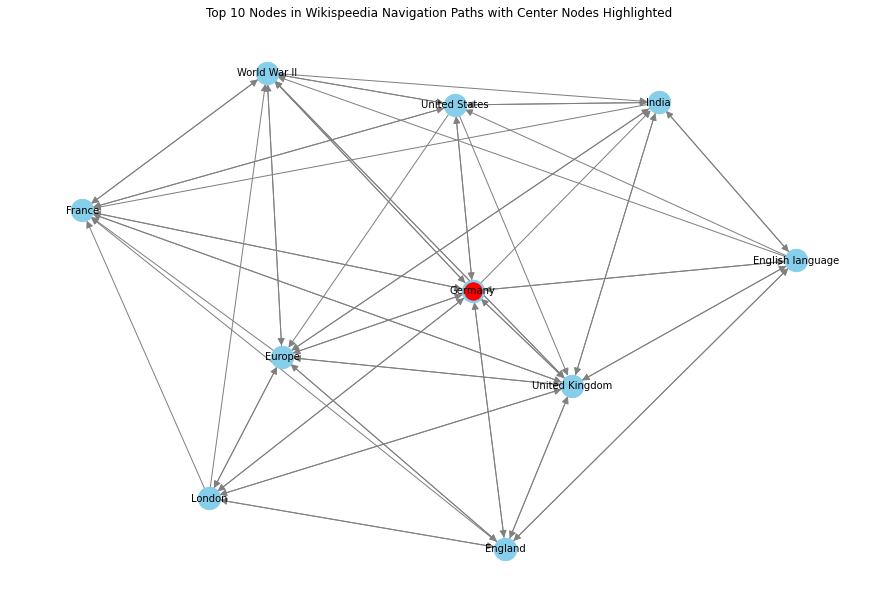

In [12]:
eccentricity = nx.eccentricity(largest_cc_subgraph)  #By Definition, minimum eccentricity implies center

#Find the center nodes (nodes with minimum eccentricity)
min_eccentricity = min(eccentricity.values())
center_nodes = [node for node, ecc in eccentricity.items() if ecc == min_eccentricity] #Get all nodes with the lowest eccentricity
print("Center nodes:", center_nodes) 

#Draw
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(largest_cc_subgraph, k=0.1)  # Positions for all nodes
nx.draw(largest_cc_subgraph, pos, node_size=500, node_color='skyblue', edge_color='gray', with_labels=True, font_size=10, arrowsize=15)

#Highlight the center nodes
nx.draw_networkx_nodes(largest_cc_subgraph, pos, nodelist=center_nodes, node_color='red')

plt.title("Top 10 Nodes in Wikispeedia Navigation Paths with Center Nodes Highlighted")
plt.show()